# Decision_Trees_plot_iris1

In [1]:
%matplotlib inline

read line by line 

Automatically created module for IPython interactive environment
Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= =

[1, 2]
[[ 3.5  1.4]
 [ 3.   1.4]
 [ 3.2  1.3]
 [ 3.1  1.5]
 [ 3.6  1.4]
 [ 3.9  1.7]
 [ 3.4  1.4]
 [ 3.4  1.5]
 [ 2.9  1.4]
 [ 3.1  1.5]
 [ 3.7  1.5]
 [ 3.4  1.6]
 [ 3.   1.4]
 [ 3.   1.1]
 [ 4.   1.2]
 [ 4.4  1.5]
 [ 3.9  1.3]
 [ 3.5  1.4]
 [ 3.8  1.7]
 [ 3.8  1.5]
 [ 3.4  1.7]
 [ 3.7  1.5]
 [ 3.6  1. ]
 [ 3.3  1.7]
 [ 3.4  1.9]
 [ 3.   1.6]
 [ 3.4  1.6]
 [ 3.5  1.5]
 [ 3.4  1.4]
 [ 3.2  1.6]
 [ 3.1  1.6]
 [ 3.4  1.5]
 [ 4.1  1.5]
 [ 4.2  1.4]
 [ 3.1  1.5]
 [ 3.2  1.2]
 [ 3.5  1.3]
 [ 3.1  1.5]
 [ 3.   1.3]
 [ 3.4  1.5]
 [ 3.5  1.3]
 [ 2.3  1.3]
 [ 3.2  1.3]
 [ 3.5  1.6]
 [ 3.8  1.9]
 [ 3.   1.4]
 [ 3.8  1.6]
 [ 3.2  1.4]
 [ 3.7  1.5]
 [ 3.3  1.4]
 [ 3.2  4.7]
 [ 3.2  4.5]
 [ 3.1  4.9]
 [ 2.3  4. ]
 [ 2.8  4.6]
 [ 2.8  4.5]
 [ 3.3  4.7]
 [ 2.4  3.3]
 [ 2.9  4.6]
 [ 2.7  3.9]
 [ 2.   3.5]
 [ 3.   4.2]
 [ 2.2  4. ]
 [ 2.9  4.7]
 [ 2.9  3.6]
 [ 3.1  4.4]
 [ 3.   4.5]
 [ 2.7  4.1]
 [ 2.2  4.5]
 [ 2.5  3.9]
 [ 3.2  4.8]
 [ 2.8  4. ]
 [ 2.5  4.9]
 [ 2.8  4.7]
 [ 2.9  4.3]
 [ 3.   4.4]
 [ 2.

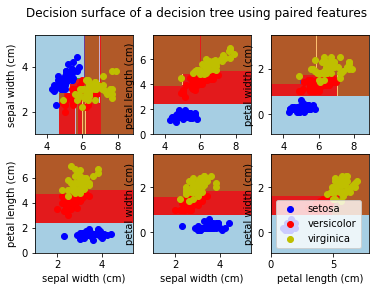

In [16]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 3
plot_colors = "bry"
plot_step = 0.02

# Load data
iris = load_iris()
print(iris.DESCR)

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    print(pair)
   
    y = iris.target
   

    # Train
    print(X)
    print(y)
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.axis("tight")
     

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],
                    cmap=plt.cm.Paired)

    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

For each pair of iris features, the decision tree learns decision boundaries made of combinations of simple thresholding rules inferred from the training samples